<h1 style="color:Orange;">IC-272 Assigment-2</h1>

<h2 style="color:Skyblue">Q1</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("iris.csv")
cols=df.columns[:-1].tolist()
cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

## Before Replacing Median

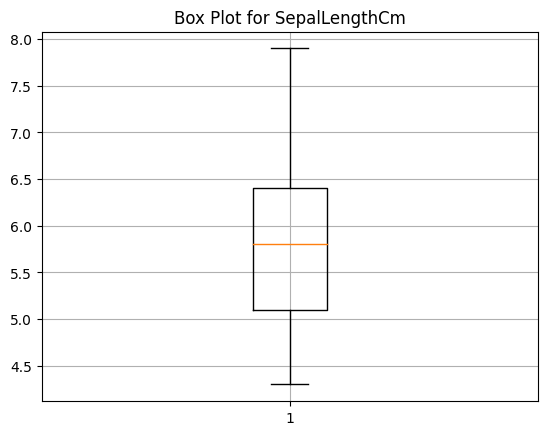

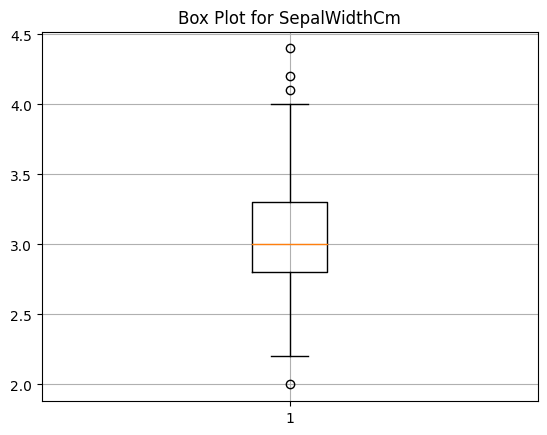

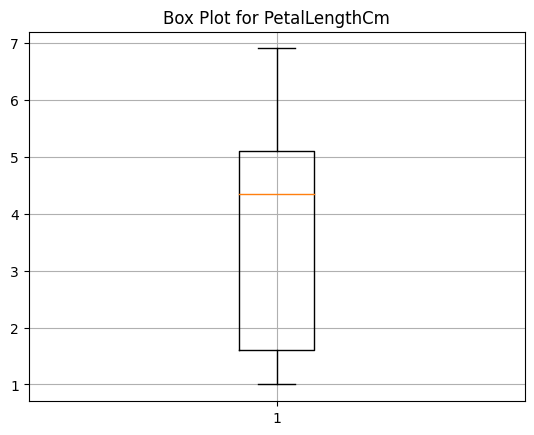

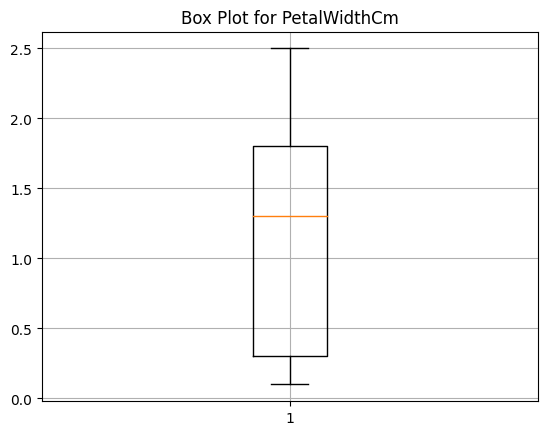

In [2]:
for i in cols:
    plt.boxplot(df[i])
    plt.title(f"Box Plot for {i}")
    plt.grid()
    plt.show()

In [3]:
for i in cols:
        med=df[i].median()
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        mini=q1-(1.5*iqr)
        maxi=q3+(1.5*iqr)
        for j,v in enumerate(df[i]):
            if v<mini or v>maxi:
                df[i].iat[j]=med

## After Median replaces the outliers

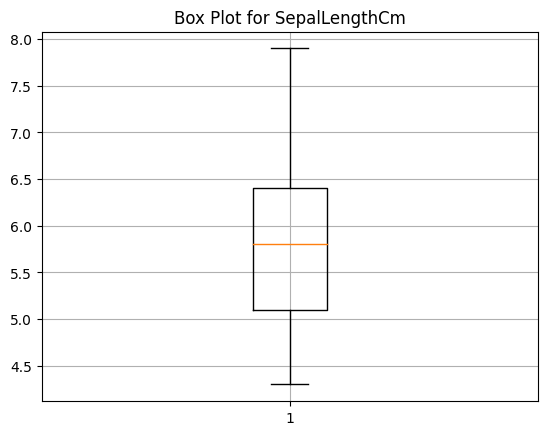

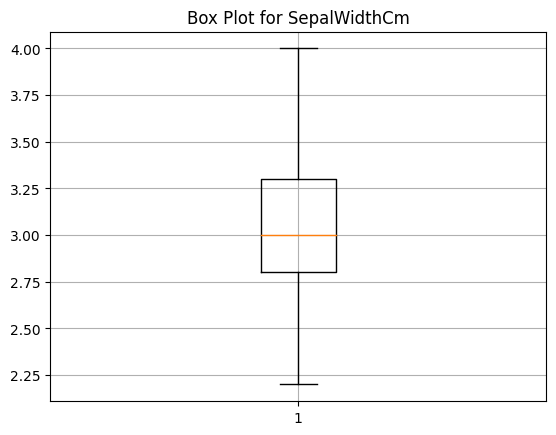

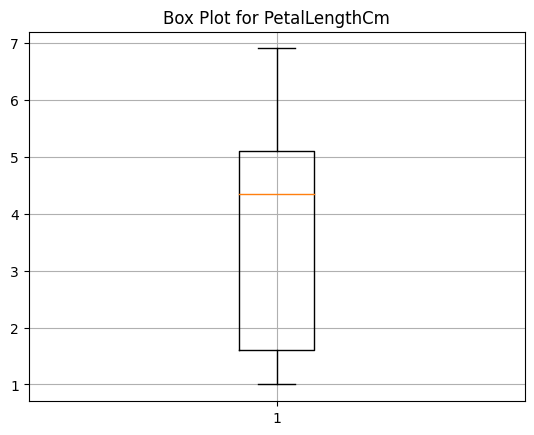

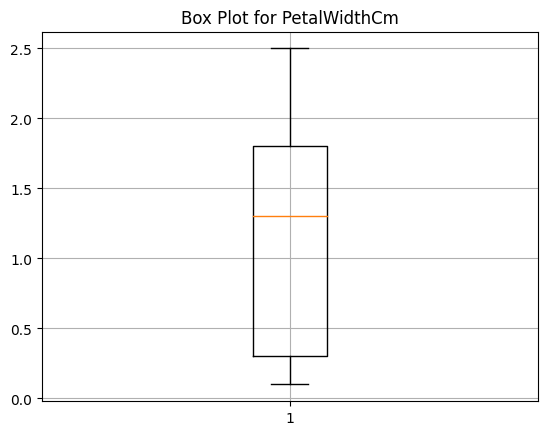

In [4]:
for i in cols:
    plt.boxplot(df[i])
    plt.title(f"Box Plot for {i}")
    plt.grid()
    plt.show()

## Extracting Values of True Class and Label

In [5]:
X_=np.array(df[df.columns[:-1]])
X=np.array(df[df.columns[:-1]]).T
Y=np.array(df['Species'])

## Now using Mean Subtracted Values

In [6]:
X.shape

(4, 150)

In [7]:
for i in range(0,4):
    X[i]=X[i]-np.mean(X[i])

In [8]:
X

array([[-7.43333333e-01, -9.43333333e-01, -1.14333333e+00,
        -1.24333333e+00, -8.43333333e-01, -4.43333333e-01,
        -1.24333333e+00, -8.43333333e-01, -1.44333333e+00,
        -9.43333333e-01, -4.43333333e-01, -1.04333333e+00,
        -1.04333333e+00, -1.54333333e+00, -4.33333333e-02,
        -1.43333333e-01, -4.43333333e-01, -7.43333333e-01,
        -1.43333333e-01, -7.43333333e-01, -4.43333333e-01,
        -7.43333333e-01, -1.24333333e+00, -7.43333333e-01,
        -1.04333333e+00, -8.43333333e-01, -8.43333333e-01,
        -6.43333333e-01, -6.43333333e-01, -1.14333333e+00,
        -1.04333333e+00, -4.43333333e-01, -6.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -8.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -1.44333333e+00,
        -7.43333333e-01, -8.43333333e-01, -1.34333333e+00,
        -1.44333333e+00, -8.43333333e-01, -7.43333333e-01,
        -1.04333333e+00, -7.43333333e-01, -1.24333333e+00,
        -5.43333333e-01, -8.43333333e-01,  1.15666667e+0

# Computing the covariance matrix using C=X<sup>T</sup>.X

In [9]:
C=np.dot(X,X.T)/150
C

array([[ 0.68112222, -0.03582667,  1.26519111,  0.51345778],
       [-0.03582667,  0.15097067, -0.26477867, -0.09501867],
       [ 1.26519111, -0.26477867,  3.09242489,  1.28774489],
       [ 0.51345778, -0.09501867,  1.28774489,  0.57853156]])

## Performing Eigen Analysis of C

In [10]:
eigen_value,eigen_vector=np.linalg.eig(C)
eigen_value

array([4.18805525, 0.20879341, 0.08118688, 0.0250138 ])

In [11]:
eigen_vector

array([[ 0.36256148, -0.71025936, -0.5363965 ,  0.27633243],
       [-0.06789732, -0.66565722,  0.67154329, -0.31830808],
       [ 0.85726975,  0.20451144,  0.06774171, -0.46762667],
       [ 0.35920426,  0.10299118,  0.50667491,  0.77694637]])

## Taking 2 Eigen Vectors(for top 2 Eigen Values) and Creating Matrix of Size 2 x 4

In [12]:
Q=eigen_vector.T[:2]
Q

array([[ 0.36256148, -0.06789732,  0.85726975,  0.35920426],
       [-0.71025936, -0.66565722,  0.20451144,  0.10299118]])

## Dimension Reduced Version  PC ∈ R<sup>150x2</sup>

In [13]:
pc=np.dot(X_,Q.T)
pc

array([[ 2.88344143, -5.64520874],
       [ 2.8448778 , -5.17032826],
       [ 2.67305906, -5.18185897],
       [ 2.8150466 , -5.00336503],
       [ 2.84039555, -5.64074852],
       [ 3.29407273, -6.04259776],
       [ 2.74487085, -5.21321422],
       [ 2.93970199, -5.48716593],
       [ 2.67038679, -4.74863285],
       [ 2.88789462, -5.22674195],
       [ 3.06435739, -5.97096684],
       [ 2.95291667, -5.32466292],
       [ 2.77270122, -5.10960144],
       [ 2.33423956, -4.81582519],
       [ 2.93183186, -6.51612118],
       [ 3.29249481, -5.69748636],
       [ 2.95116483, -6.12440234],
       [ 2.91936186, -5.63490962],
       [ 3.37371048, -6.19940897],
       [ 2.98471964, -5.81415564],
       [ 3.25618054, -5.73036739],
       [ 3.0274298 , -5.7372908 ],
       [ 2.35246306, -5.43844935],
       [ 3.2619631 , -5.41982651],
       [ 3.2100976 , -5.26330949],
       [ 3.0525879 , -5.2004519 ],
       [ 3.09726982, -5.44611655],
       [ 3.00542456, -5.69578353],
       [ 2.92648731,

## Scatter Plot Between Dimension Reduced Data and Superimposing Eigen Directions

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_dim_transformed=scaler.fit_transform(pc)
new_dim_transformed


soa = np.array([[0, 0, eigen_value[0] * eigen_vector[0][0], eigen_value[0] * eigen_vector[1][0]]])
soa1 = np.array([[0, 0, eigen_value[1] * eigen_vector[0][1], eigen_value[1] * eigen_vector[1][1]]])
x0, y0, u0, v0 = zip(*soa)
x1, y1, u1, v1 = zip(*soa1)

Text(0.5, 1.0, 'Plot Between PC1 and PC2 after Standardisation and Eigen Vector')

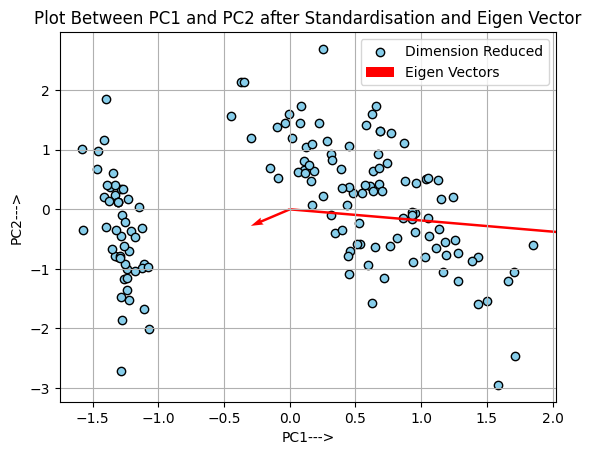

In [15]:
plt.scatter(new_dim_transformed.T[0],new_dim_transformed.T[1],color='skyblue',edgecolor='black',marker='o',label='Dimension Reduced')
plt.quiver(x0, y0, u0, v0, angles='xy', scale_units='xy',color='red', scale=0.5, width=0.005)
plt.quiver(x1, y1, u1, v1, angles='xy', scale_units='xy',color='red', scale=0.5, width=0.005, label='Eigen Vectors')
plt.grid()
plt.xlabel("PC1--->")
plt.ylabel("PC2--->")
plt.legend()
plt.title("Plot Between PC1 and PC2 after Standardisation and Eigen Vector")

## Reconstruction of Data from Dimension-Reduced Data

In [16]:
recon_data=np.dot(pc,Q)
print("Reconstructed Data: \n",recon_data)

Reconstructed Data: 
 [[5.05498713 3.56199599 1.31737736 0.4543377 ]
 [4.70371714 3.24850674 1.38143641 0.48939398]
 [4.64961208 3.26784827 1.23178325 0.42648839]
 [4.57431429 3.13939192 1.39000892 0.49587422]
 [5.03621244 3.56194972 1.2813876  0.4393348 ]
 [5.48611549 3.7986401  1.58812855 0.56091064]
 [4.69791862 3.28384429 1.28693281 0.44905418]
 [4.96313366 3.45297372 1.3979294  0.49082374]
 [4.34094031 2.97964962 1.31809208 0.47014697]
 [4.75938173 3.2831382  1.40677618 0.49903569]
 [5.35195303 3.76655552 1.40584988 0.48577326]
 [4.85250551 3.34390517 1.44249167 0.51230689]
 [4.6344169  3.21298409 1.33198095 0.46972217]
 [4.26679026 3.04720018 1.01618163 0.34248124]
 [5.69110535 4.13843957 1.18074945 0.38202344]
 [5.2404248  3.56902134 1.65735507 0.59588727]
 [5.41989276 3.87637643 1.277434   0.42931151]
 [5.06069545 3.55270141 1.35027714 0.46830118]
 [5.6263657  3.89761542 1.6243299  0.57336668]
 [5.21170282 3.6675802  1.36964853 0.47331722]
 [5.2506127  3.59337448 1.6194994  0.5

In [17]:
print("Original Data: \n",X_)

Original Data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 3.  1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 3.  1.5 0.1]
 [5.5 3.  1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 

## Computation of RMSE between X_(Original) and recon_data(Reconstructed)

In [18]:
def rmse(x,y):
    sumx=0
    dic={}
    for i in range(0,4):
        sumx=sum((x[i]-y[i])**2)
        rmse_=np.sqrt(sumx/150)
        dic[i]=rmse_
        sumx=0
    return dic

In [19]:
r=rmse(X_.T,recon_data.T)

#### Here i have taken transpose so 150x4 will convert to 4x150 i.e. each row will denote one column and we can calculate RMSE for each attribute

In [20]:
print(f"RMSE of SepalLengthCm is {r[0]}")
print(f"RMSE of SepalWidthCm is {r[1]}")
print(f"RMSE of PetalLengthCm is {r[2]}")
print(f"RMSE of PetalWidthCm is {r[3]}")

RMSE of SepalLengthCm is 0.17623877643378633
RMSE of SepalWidthCm is 0.22177898583852165
RMSE of PetalLengthCm is 0.10192763418286296
RMSE of PetalWidthCm is 0.3190980699992785


<h2 style="color: skyblue;">Q2 (KNN)</h2>

In [21]:
pc.shape

(150, 2)

In [22]:
Y.shape

(150,)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(pc,Y,random_state=104,shuffle=True,test_size=0.2)

In [24]:
def euclidean(x_test,x_train):
    return pow( pow(x_test - x_train,2).sum() , 0.5)

In [25]:
knn=[]
for i,y in enumerate(X_test):
    l1=[]
    for j,v in enumerate(X_train):
        l1.append([Y_train[j],euclidean(y,v)])
    l1.sort(key=lambda x:x[1])
    knn.append(np.array(l1[0:5]))
knn=np.array(knn)
knn

array([[['Iris-setosa', '0.12982900899219021'],
        ['Iris-setosa', '0.1459619915553674'],
        ['Iris-setosa', '0.16080066179632813'],
        ['Iris-setosa', '0.1806614157873832'],
        ['Iris-setosa', '0.18319909579525662']],

       [['Iris-setosa', '0.4291512812431685'],
        ['Iris-setosa', '0.45730390587695446'],
        ['Iris-setosa', '0.4774651849368472'],
        ['Iris-setosa', '0.498055386453105'],
        ['Iris-setosa', '0.50845086811516']],

       [['Iris-setosa', '0.07974454108278094'],
        ['Iris-setosa', '0.12345281237210826'],
        ['Iris-setosa', '0.1758747426983675'],
        ['Iris-setosa', '0.19066989108928145'],
        ['Iris-setosa', '0.23657586720535703']],

       [['Iris-versicolor', '0.15719497494400703'],
        ['Iris-versicolor', '0.310226814188337'],
        ['Iris-versicolor', '0.3733844247468467'],
        ['Iris-versicolor', '0.39416067658005044'],
        ['Iris-versicolor', '0.4117272157799807']],

       [['Iris-virginica',

## Now using the most frequent value of Y in KNN to assign to X_test 

In [26]:
import statistics as stat
predicted=np.array([stat.mode(knn[i][:,0]) for i in range(len(knn))])

In [27]:
pd.DataFrame({'Predicted':predicted, "Original":Y_test})

,Predicted,Original
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-setosa,Iris-setosa


## Plotting the Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,predicted)

In [29]:
cm

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  6]], dtype=int64)

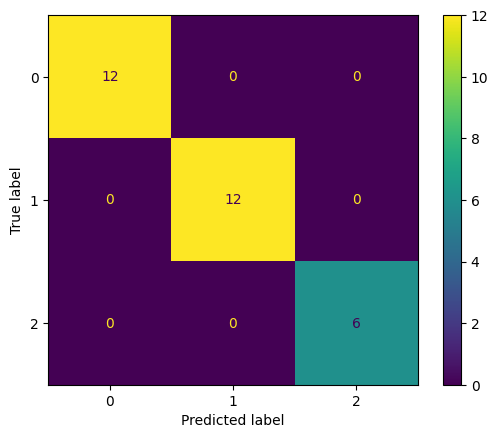

In [30]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay(cm).plot()